In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
inpath='/content/gdrive/My Drive/Brain'
output_path='/content/gdrive/My Drive'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Fully1='/content/gdrive/My Drive/Brain/Volumesf1.npy'

Under1='/content/gdrive/My Drive/Brain/VolumesUnderf1.npy'

Fully2='/content/gdrive/My Drive/Brain/Volumesf2.npy'

Under2='/content/gdrive/My Drive/Brain/VolumesUnderf2.npy'

Fully3='/content/gdrive/My Drive/Brain/Volumesf3.npy'

Under3='/content/gdrive/My Drive/Brain/VolumesUnderf3.npy'

Fully4='/content/gdrive/My Drive/Brain/Volumesf4.npy'

Under4='/content/gdrive/My Drive/Brain/VolumesUnderf4.npy'

FullyS1=np.load(Fully1)
FullyS2=np.load(Fully2)
FullyS3=np.load(Fully3)
FullyS4=np.load(Fully4)
UnderS1=np.load(Under1)
UnderS2=np.load(Under2)
UnderS3=np.load(Under3)
UnderS4=np.load(Under4)

#UnderS3=np.load(Under3)
#Fully_Sampled= np.asarray(FullyS1)
#Undersampled= np.asarray(UnderS1)
Fully_Sampled=np.asarray( np.concatenate((FullyS1,FullyS1,FullyS1,FullyS1),axis=0))
Undersampled=np.asarray(np.concatenate((UnderS1,UnderS2,UnderS3,UnderS4),axis=0))

#from sklearn.model_selection import train_test_split
undersampled_train,undersampled_test,vol_val_train,vol_val_test = train_test_split(Undersampled,Fully_Sampled, test_size=0.2, random_state=0)
  
undersampled_train=undersampled_train.reshape(64,4,128,128,20)
undersampled_train=undersampled_train[:,:,:,:,0:1]
undersampled_train=undersampled_train.reshape(64,4,128,128)
vol_val_train=vol_val_train.reshape(64,4,128,128,20)
vol_val_train=vol_val_train[:,:,:,:,0:1]
vol_val_train=vol_val_train.reshape(64,4,128,128)
undersampled_test=undersampled_test.reshape(16,4,128,128,20)
undersampled_test=undersampled_test[:,:,:,:,0:1]
undersampled_test=undersampled_test.reshape(16,4,128,128)
vol_val_test=vol_val_test.reshape(16,4,128,128,20)
vol_val_test=vol_val_test[:,:,:,:,0:1]
vol_val_test=vol_val_test.reshape(16,4,128,128)
Artifact_train=undersampled_train-vol_val_train
Artifact_test=undersampled_test-vol_val_test
print(Artifact_train.shape)







'''

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
#from tensorboardX import SummaryWriter
    
import torch.utils.data as utils






#undersampled=VolumesUnder
undersampled_train=torch.tensor(undersampled_train)
print(undersampled_train.size())

#undersampled_train=undersampled_train[-1,0:256,0:15360]
print(undersampled_train.size()) 


#artifact_train = np.transpose(artifact_train, (0, 1, 3, 2))
#artifact_train=artifact_train[0:6,0:256,0:15360,0:1]

vol_val_train = torch.tensor(vol_val_train)
print(vol_val_train.size()) 

#artifact_train=artifact_train[-1,0:256,0:15360]
trainset=utils.TensorDataset(undersampled_train,vol_val_train)
#train_dataset=utils.DataLoader(trainset)
print(undersampled_train.size())

#TEST SET
undersampled_test=torch.tensor(undersampled_test)
vol_val_test = torch.tensor(vol_val_test)
testset=utils.TensorDataset(undersampled_test,vol_val_test)
#test_dataset=utils.DataLoader(testset)
'''


(64, 4, 128, 128)


'\n\nimport torch\nimport torch.nn as nn\nimport torchvision.transforms as transforms\nimport torchvision.datasets as dsets\nfrom torch.autograd import Variable\n#from tensorboardX import SummaryWriter\n    \nimport torch.utils.data as utils\n\n\n\n\n\n\n#undersampled=VolumesUnder\nundersampled_train=torch.tensor(undersampled_train)\nprint(undersampled_train.size())\n\n#undersampled_train=undersampled_train[-1,0:256,0:15360]\nprint(undersampled_train.size()) \n\n\n#artifact_train = np.transpose(artifact_train, (0, 1, 3, 2))\n#artifact_train=artifact_train[0:6,0:256,0:15360,0:1]\n\nvol_val_train = torch.tensor(vol_val_train)\nprint(vol_val_train.size()) \n\n#artifact_train=artifact_train[-1,0:256,0:15360]\ntrainset=utils.TensorDataset(undersampled_train,vol_val_train)\n#train_dataset=utils.DataLoader(trainset)\nprint(undersampled_train.size())\n\n#TEST SET\nundersampled_test=torch.tensor(undersampled_test)\nvol_val_test = torch.tensor(vol_val_test)\ntestset=utils.TensorDataset(undersamp

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,PReLU
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.optimizers import Adam
#adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
input_img = Input(shape=(128, 128,4))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = UpSampling2D((2, 2))(x)
x= Conv2D(16, (5, 5), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
decoded = Conv2D(4, (1, 1), activation='sigmoid',padding='valid',activity_regularizer=regularizers.l1(10e-9))(x)
#decoded=PReLU( shared_axes=[1,2])(decoded)


autoencoder1 = Model(input_img, decoded)
#autoencoder1.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='binary_crossentropy')
autoencoder1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

undersampled_train = np.reshape(undersampled_train, (len(undersampled_train), 128, 128,4))  # adapt this if using `channels_first` image data format
undersampled_test = np.reshape(undersampled_test, (len(undersampled_test), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_train = np.reshape(vol_val_train, (len(vol_val_train), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_test = np.reshape(vol_val_test, (len(vol_val_test), 128, 128,4))
Artifact_train=np.reshape(Artifact_train, (len(Artifact_train), 128, 128,4))
Artifact_test=np.reshape(Artifact_test, (len(Artifact_test), 128, 128,4))


In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.regularizers import l1


inputs = Input(shape=(128, 128,4))

    
conv1 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-4))(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(UpSampling2D(size = (2,2))(conv6))
#merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(up7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(UpSampling2D(size = (2,2))(conv7))
#merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(up8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(10e-9))(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(0.001))(UpSampling2D(size = (2,2))(conv8))
#merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(0.001))(up9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(0.001))(conv9)
conv9 = Conv2D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',activity_regularizer=l1(0.001))(conv9)
conv10 = Conv2D(4, 1,activation = 'sigmoid')(conv9)
#conv10=PReLU(alpha_initializer='zeros', alpha_regularizer=0.001, alpha_constraint=None, shared_axes=[1,2])(conv10)

autoencoder = Model(input = inputs, output = conv10)

#model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), loss='mse')
#model.compile(optimizer=Adam(lr=0.001), loss='kullback_leibler_divergence')
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

undersampled_train = np.reshape(undersampled_train, (len(undersampled_train), 128, 128,4))  # adapt this if using `channels_first` image data format
undersampled_test = np.reshape(undersampled_test, (len(undersampled_test), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_train = np.reshape(vol_val_train, (len(vol_val_train), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_test = np.reshape(vol_val_test, (len(vol_val_test), 128, 128,4))
Artifact_train=np.reshape(Artifact_train, (len(Artifact_train), 128, 128,4))
Artifact_test=np.reshape(Artifact_test, (len(Artifact_test), 128, 128,4))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
from keras.callbacks import TensorBoard

autoencoder1.fit(undersampled_train, Artifact_train,
                epochs=300,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, Artifact_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

Train on 64 samples, validate on 16 samples
Epoch 1/300
64/64 [==============================] - 8s 120ms/step - loss: 0.2778 - val_loss: 0.1494
Epoch 2/300
64/64 [==============================] - 6s 92ms/step - loss: 0.0615 - val_loss: 0.0428
Epoch 3/300
64/64 [==============================] - 6s 97ms/step - loss: 0.0394 - val_loss: 0.0398
Epoch 4/300
64/64 [==============================] - 6s 93ms/step - loss: 0.0368 - val_loss: 0.0374
Epoch 5/300
64/64 [==============================] - 6s 87ms/step - loss: 0.0353 - val_loss: 0.0364
Epoch 6/300
64/64 [==============================] - 6s 94ms/step - loss: 0.0345 - val_loss: 0.0372
Epoch 7/300
64/64 [==============================] - 6s 90ms/step - loss: 0.0336 - val_loss: 0.0372
Epoch 8/300
64/64 [==============================] - 6s 98ms/step - loss: 0.0333 - val_loss: 0.0350
Epoch 9/300
64/64 [==============================] - 6s 96ms/step - loss: 0.0330 - val_loss: 0.0348
Epoch 10/300
64/64 [==============================] - 6

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(undersampled_train, Artifact_train,
                epochs=50,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, Artifact_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

Train on 64 samples, validate on 16 samples
Epoch 1/50
64/64 [==============================] - 132s 2s/step - loss: 93.2365 - val_loss: 0.6795
Epoch 2/50
64/64 [==============================] - 126s 2s/step - loss: 0.6583 - val_loss: 0.6403
Epoch 3/50
64/64 [==============================] - 128s 2s/step - loss: 0.6255 - val_loss: 0.6109
Epoch 4/50
64/64 [==============================] - 127s 2s/step - loss: 0.5977 - val_loss: 0.5833
Epoch 5/50
64/64 [==============================] - 128s 2s/step - loss: 0.5700 - val_loss: 0.5570
Epoch 6/50
64/64 [==============================] - 127s 2s/step - loss: 0.5448 - val_loss: 0.5328
Epoch 7/50
64/64 [==============================] - 130s 2s/step - loss: 0.5212 - val_loss: 0.5097
Epoch 8/50
64/64 [==============================] - 128s 2s/step - loss: 0.4985 - val_loss: 0.4880
Epoch 9/50
64/64 [==============================] - 129s 2s/step - loss: 0.4772 - val_loss: 0.4671
Epoch 10/50
64/64 [==============================] - 125s 2s/ste

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0   

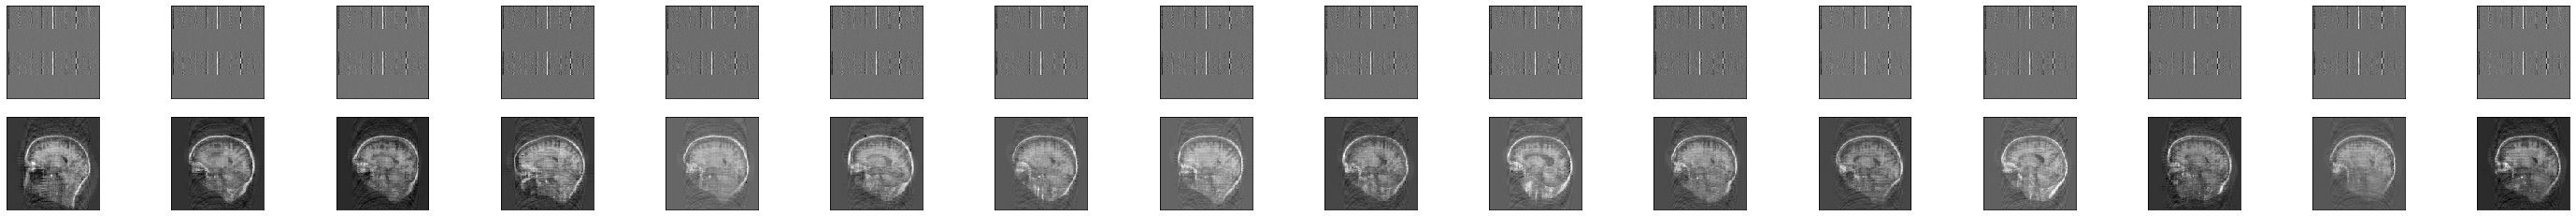

In [ ]:
import matplotlib.pyplot as plt
import pywt
decoded_imgs = autoencoder1.predict(undersampled_test)

def idwav(imgs):
    imagepred=[]
    for imagef in imgs:
        imagef=imagef.reshape(4,128,128)
        c1,c2,c3,c4= np.array_split(imagef, 4,axis=0)
    
    #ca,cd=np.dsplit(imagef, 2)
        coeffs1=c1,(c2,c3,c4)
        imageff=pywt.idwt2(coeffs1, 'haar')
        #print(np.shape(imageff))
        imageff=imageff.reshape(256,256)
        imagepred.append(imageff)
    imagepred=np.asarray(imagepred,dtype=np.float64)
    return imagepred
fullsampled=undersampled_test-decoded_imgs#fullysampled# 
#undersampled_test_input=idwav(undersampled_test)
imagepred=idwav(fullsampled)
vol_val_test1=idwav(vol_val_test)


n = 16
plt.figure(figsize=(50, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(vol_val_test1[i])##################printing test input
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +n+1)
    plt.imshow(imagepred[i].reshape(256, 256))#######################printing prediction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#original_images=idwav(vol_val_test)#######fully test images


from skimage.measure import compare_ssim as ssim

for im1,im2 in zip(vol_val_test1,imagepred):
    ssim_const = ssim(im1,im2)
                
    print(ssim_const)
      

0.24172674603580788
0.31920623035970086
0.29313806899154965
0.2616732071760832
0.30843115802687854
0.28568803509564045
0.31093150591339064
0.28740473822959095
0.29765977215603295
0.2790841340104384
0.2717439891665151
0.32201992848244587
0.26543912395702596
0.28969093832986675
0.3387523313349946
0.29499359537742414


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(undersampled_train, Artifact_train,
                epochs=300,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, Artifact_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

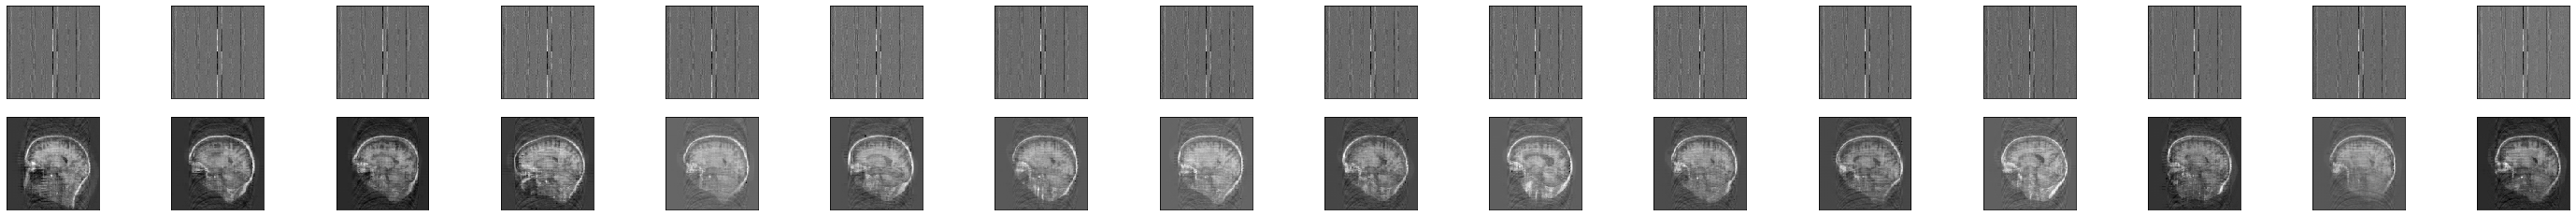

In [ ]:
import matplotlib.pyplot as plt
import pywt
decoded_imgs1 = autoencoder.predict(undersampled_test)

def idwav(imgs):
    imagepred=[]
    for imagef in imgs:
        imagef=imagef.reshape(4,128,128)
        c1,c2,c3,c4= np.array_split(imagef, 4,axis=0)
    
    #ca,cd=np.dsplit(imagef, 2)
        coeffs1=c1,(c2,c3,c4)
        imageff=pywt.idwt2(coeffs1, 'haar')
        #print(np.shape(imageff))
        imageff=imageff.reshape(256,256)
        imagepred.append(imageff)
    imagepred=np.asarray(imagepred,dtype=np.float64)
    return imagepred
fullsampled1=undersampled_test-decoded_imgs#fullysampled# 
#undersampled_test_input=idwav(undersampled_test)
imagepred1=idwav(fullsampled1)
vol_val_test2=idwav(vol_val_test)


n = 16
plt.figure(figsize=(50, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(vol_val_test2[i])##################printing test input
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +n+1)
    plt.imshow(imagepred1[i].reshape(256, 256))#######################printing prediction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#original_images=idwav(vol_val_test)#######fully test images


from skimage.measure import compare_ssim as ssim

for im1,im2 in zip(vol_val_test2,imagepred1):
    ssim_const = ssim(im1,im2)
                
    print(ssim_const)

0.2024760775048766
0.2679079572283068
0.23388187514814487
0.2074274942111345
0.24227356784869764
0.2247330226307158
0.2610499068329622
0.2270931606783296
0.2291735440732741
0.22452508945242544
0.21719451376665672
0.26288798504214506
0.20957262429831602
0.24474686541295063
0.2823561907602683
0.24114809873229595
